In [58]:
# importing dependencies

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib
import numpy as np; np.random.seed(2223)
import pandas as pd
import datetime as dt
import matplotlib.style as style
style.available
import seaborn as sns


# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect,desc, func

# Reflect Tables into SQLAlchemy ORM

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# finding columns of tables
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [19]:
# finding columns of tables
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [21]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(desc('date')).first()
last_date


('2017-08-23')

In [22]:
# creating date time objects of first and last date required
date1 = dt.datetime(2017,8,23)
date2 = dt.datetime(2016,8,23)

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Perform a query to retrieve the data and precipitation scores


prec_1_year = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date>date2).filter(Measurement.date<date1).all()
prec_1_year


[(2.0, '2016-08-24'),
 (2.0, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.3, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.0, '2016-08-30'),
 (3.3, '2016-08-31'),
 (0.0, '2016-09-01'),
 (0.0, '2016-09-02'),
 (0.0, '2016-09-03'),
 (0.8, '2016-09-04'),
 (None, '2016-09-05'),
 (None, '2016-09-06'),
 (1.3, '2016-09-07'),
 (0.0, '2016-09-08'),
 (0.8, '2016-09-09'),
 (0.0, '2016-09-10'),
 (1.3, '2016-09-11'),
 (0.0, '2016-09-12'),
 (0.5, '2016-09-13'),
 (33.5, '2016-09-14'),
 (10.7, '2016-09-15'),
 (1.5, '2016-09-16'),
 (1.3, '2016-09-17'),
 (0.0, '2016-09-18'),
 (0.0, '2016-09-19'),
 (0.0, '2016-09-20'),
 (0.0, '2016-09-21'),
 (0.5, '2016-09-22'),
 (0.0, '2016-09-23'),
 (0.0, '2016-09-24'),
 (0.0, '2016-09-25'),
 (1.5, '2016-09-26'),
 (0.5, '2016-09-27'),
 (0.0, '2016-09-28'),
 (0.0, '2016-09-29'),
 (0.0, '2016-09-30'),
 (0.0, '2016-10-01'),
 (0.0, '2016-10-02'),
 (0.0, '2016-10-03'),
 (0.0, '2016-10-04'),
 (0.0, '2016-10-05'),
 (0.0, '2016-10-06'),
 (0.0, '2016-10-07'),
 (0.0,

In [26]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prec_1_year_df = pd.DataFrame(prec_1_year, columns=['precipitation', 'Date'])
prec_1_year_df.set_index('Date')

# Convert object type to datetime object
prec_1_year_df["Date"] = prec_1_year_df["Date"].astype('datetime64[ns]')

In [27]:
# Sort the dataframe by date
prec_1_year_df.sort_values(by='Date', ascending = False, inplace = True)
prec_1_year_df

,precipitation,Date
2222,11.4,2017-08-23
1523,2.0,2017-08-23
1005,0.0,2017-08-23
359,0.0,2017-08-23
1522,0.0,2017-08-22
...,...,...
1188,31.0,2016-08-24
1875,36.8,2016-08-24
360,54.6,2016-08-24
1524,54.6,2016-08-24


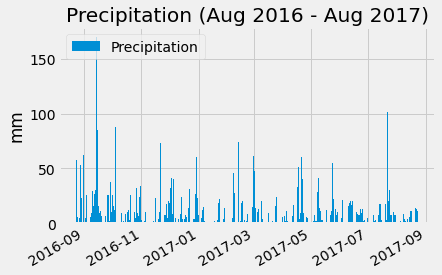

In [54]:
# Use Pandas Plotting with Matplotlib to plot the data
df = pd.DataFrame(np.cumsum(np.random.randn(2223)), 
                  columns=['precipitation'], index=pd.to_datetime(prec_1_year_df["Date"]))

plt.bar(df.index, prec_1_year_df["precipitation"].values)
plt.gcf().autofmt_xdate()
plt.rcParams["figure.figsize"] = (20,15)
plt.ylabel("mm")
leg = ['Precipitation']
plt.legend(leg,loc='upper left')
plt.title("Precipitation (Aug 2016 - Aug 2017)")
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data

mean = prec_1_year_df["precipitation"].mean()
median = prec_1_year_df["precipitation"].median()

print(f"The mean and median precipitation for last year is \n* Mean * Precipitation: {mean} mm \n* Median * Precipitation: {median} mm")

The mean and median precipitation for last year is 
* Mean * Precipitation: 4.4851116625310175 mm 
* Median * Precipitation: 0.5 mm


# Exploratory Station Analysis

In [13]:
stations_list = session.query(Station.id ,Station.name, Station.station, Station.longitude, Station.latitude, Station.elevation).all()
stations_list_df = pd.DataFrame(stations_list, columns=["id", "name", "station", "longitude", "latitude", "elevation"])
stations_list_df.set_index('id', inplace=True)
stations_list_df

,name,station,longitude,latitude,elevation
id,,,,,
0,"WAIKIKI 717.2, HI US",USC00519397,-157.81680,21.27160,0.914
1,"KANEOHE 838.1, HI US",USC00513117,-157.80150,21.42340,4.450
2,"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830,-157.83740,21.52130,2.133
3,"PEARL CITY, HI US",USC00517948,-157.97510,21.39340,3.627
4,"UPPER WAHIAWA 874.3, HI US",USC00518838,-158.01110,21.49920,93.447
5,"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,-157.71139,21.33556,5.943
6,"WAIHEE 837.5, HI US",USC00519281,-157.84889,21.45167,10.027
7,"HONOLULU OBSERVATORY 702.2, HI US",USC00511918,-157.99920,21.31520,0.274
8,"MANOA LYON ARBO 785.2, HI US",USC00516128,-157.80250,21.33310,46.449


In [16]:
# Design a query to calculate the total number stations in the dataset
len(stations_list_df)

stations_count = session.query(Station.id).count()
stations_count

9

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()